In [1]:
from analyze_data import load_data

data = load_data()

In [42]:
for group, d in data.items():
    print(group, len(d))

c-t 56
t-c 51
t-ch 53
ch-t 53


In [7]:
from operator import itemgetter
for group, d in data.items():
    print(group)
    for interviewee in sorted(d, key=itemgetter('total_time')):
        print(interviewee['total_time'],'\t', interviewee)


c-t
62.52 	 {'rok': 1996, 'plec': 'Kobieta', 'wyksztalcenie': 'średnie', 'q1': -2, 'q2': 1, 'total_time': 62.52, 't1': 16.51, 't2': 24.45, 'misc': 21.56}
67.94 	 {'rok': 1996, 'plec': 'Mężczyzna', 'wyksztalcenie': 'wyższe (licencjat, inżynier, magister)', 'q1': -1, 'q2': 1, 'total_time': 67.94, 't1': 24.52, 't2': 24.97, 'misc': 18.45}
75.91 	 {'rok': 1995, 'plec': 'Kobieta', 'wyksztalcenie': 'wyższe (licencjat, inżynier, magister)', 'q1': -1, 'q2': -1, 'total_time': 75.91, 't1': 30.86, 't2': 26.8, 'misc': 18.25}
81.34 	 {'rok': 1982, 'plec': 'Kobieta', 'wyksztalcenie': 'wyższe (licencjat, inżynier, magister)', 'q1': -2, 'q2': -2, 'total_time': 81.34, 't1': 29.52, 't2': 29.46, 'misc': 22.36}
81.97 	 {'rok': 1994, 'plec': 'Mężczyzna', 'wyksztalcenie': 'wyższe (licencjat, inżynier, magister)', 'q1': -2, 'q2': 0, 'total_time': 81.97, 't1': 26.84, 't2': 31.76, 'misc': 23.37}
82.47 	 {'rok': 1994, 'plec': 'Kobieta', 'wyksztalcenie': 'wyższe (licencjat, inżynier, magister)', 'q1': -2, 'q2': 0

c-t


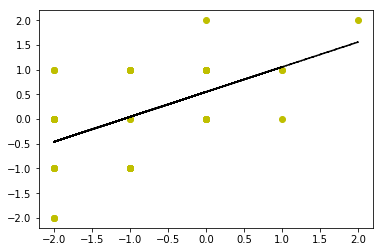

t-c


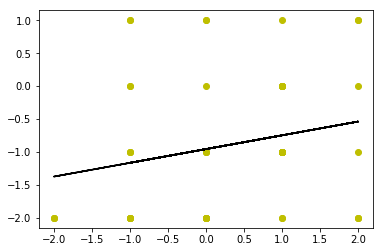

t-ch


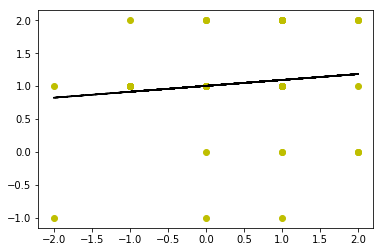

ch-t


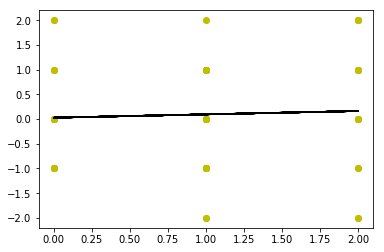

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np

for group, d in data.items():
    print(group)
    x = [interviewee['q1'] for interviewee in d]
    y = [interviewee['q2'] for interviewee in d]
    
    fit = np.polyfit(x,y,1)
    fun = np.poly1d(fit)
    
    plt.plot(x, y, 'yo', x, fun(x), '--k')
    plt.show()
    plt.clf()
    

In [37]:
from tabulate import tabulate

def position_of_truetemp(group):
    stories = group.split('-')
    pos = stories.index('t')
    return pos, stories[(pos+1)%2]

labels = ['group', 'q1', 'var1', 'q2', 'var2']
mean_data = []

for group, d in data.items():
    q1 = [interviewee['q1'] for interviewee in d]
    q2 = [interviewee['q2'] for interviewee in d]
    
    mean_data.append([group, np.mean(q1), np.var(q1), np.mean(q2), np.var(q2)])


print(tabulate(mean_data, labels))

labels.append('truetemp')
for d in mean_data:
    pos, _ = position_of_truetemp(d[0])
    truetemp = d[1+pos*2]
    d.append(truetemp)
    
mean_data = sorted(mean_data, key=itemgetter(-1))
print(tabulate(mean_data, labels))

group           q1     var1          q2      var2
-------  ---------  -------  ----------  --------
c-t      -0.910714  1.00989   0.0892857  0.938457
t-c       0.254902  1.28797  -0.901961   1.10804
t-ch      0.377358  1.10288   1.03774    0.60235
ch-t      0.981132  0.58455   0.0943396  1.25525
group           q1     var1          q2      var2    truetemp
-------  ---------  -------  ----------  --------  ----------
c-t      -0.910714  1.00989   0.0892857  0.938457   0.0892857
ch-t      0.981132  0.58455   0.0943396  1.25525    0.0943396
t-c       0.254902  1.28797  -0.901961   1.10804    0.254902
t-ch      0.377358  1.10288   1.03774    0.60235    0.377358


In [43]:
from collections import defaultdict

truetemp_pos_data = defaultdict(lambda: [])
for group, d in data.items():
    truetemp_pos, other = position_of_truetemp(group)
    answers = [interviewee['q{}'.format(truetemp_pos+1)] for interviewee in d]
    if truetemp_pos:
        label = other
    else:
        label = 'none'
    truetemp_pos_data[label] += answers

preceding      truetemp mean    truetemp var
-----------  ---------------  --------------
c                  0.0892857        0.938457
none               0.317308         1.19739
ch                 0.0943396        1.25525


(-2, 2)

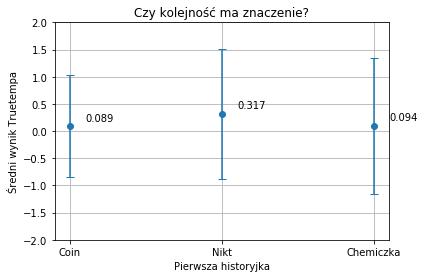

In [95]:
labels = ['preceding', 'truetemp mean', 'truetemp var']

preceding_data = []
for group, answers in truetemp_pos_data.items():
    preceding_data.append([group, np.mean(answers), np.var(answers)])

print(tabulate(preceding_data, labels))

answer = [d[1] for d in preceding_data]
v = [d[2] for d in preceding_data]

plt.errorbar(range(3), answer, yerr=v, fmt='o', capsize=4)
plt.xticks(range(3), ('Coin', 'Nikt', 'Chemiczka'))
plt.grid(True)

plt.title('Czy kolejność ma znaczenie?')
plt.xlabel('Pierwsza historyjka')
plt.ylabel('Średni wynik Truetempa')

d = 0.1
for x, y in zip(range(3), answer):
    plt.annotate('{:.3f}'.format(y), xy = [x+d,y+d])
    
plt.ylim(-2, 2)